In [76]:
import keras
%load_ext autoreload
%autoreload 2
%matplotlib inline

import ml_analyze as mla
import ml_plot as plt
import ml_internal as mlint
import ml_data as mld
import matplotlib.pyplot as plt

from keras.datasets import mnist
from sklearn.metrics import recall_score, precision_score
from tensorflow.data import Dataset
from sklearn.metrics import confusion_matrix, classification_report
import itertools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
(x_train, y_train),  (x_test, y_test) =  mnist.load_data()

In [47]:
import numpy as np

y_true = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])
y_pred = np.array([1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 2, 1])

# y_true = np.resize(y_true, (7, 1))
#
# y_pred = np.resize(y_pred, (7, 1))
y_pred, y_true

(array([1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 2, 1]),
 array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]))

In [48]:
recall = recall_score(y_true=y_true, y_pred=y_pred, average="macro", zero_division=0)
precision = precision_score(y_true=y_true, y_pred=y_pred, average="macro", zero_division=0)
recall, precision

(0.7333333333333334, 0.7777777777777777)

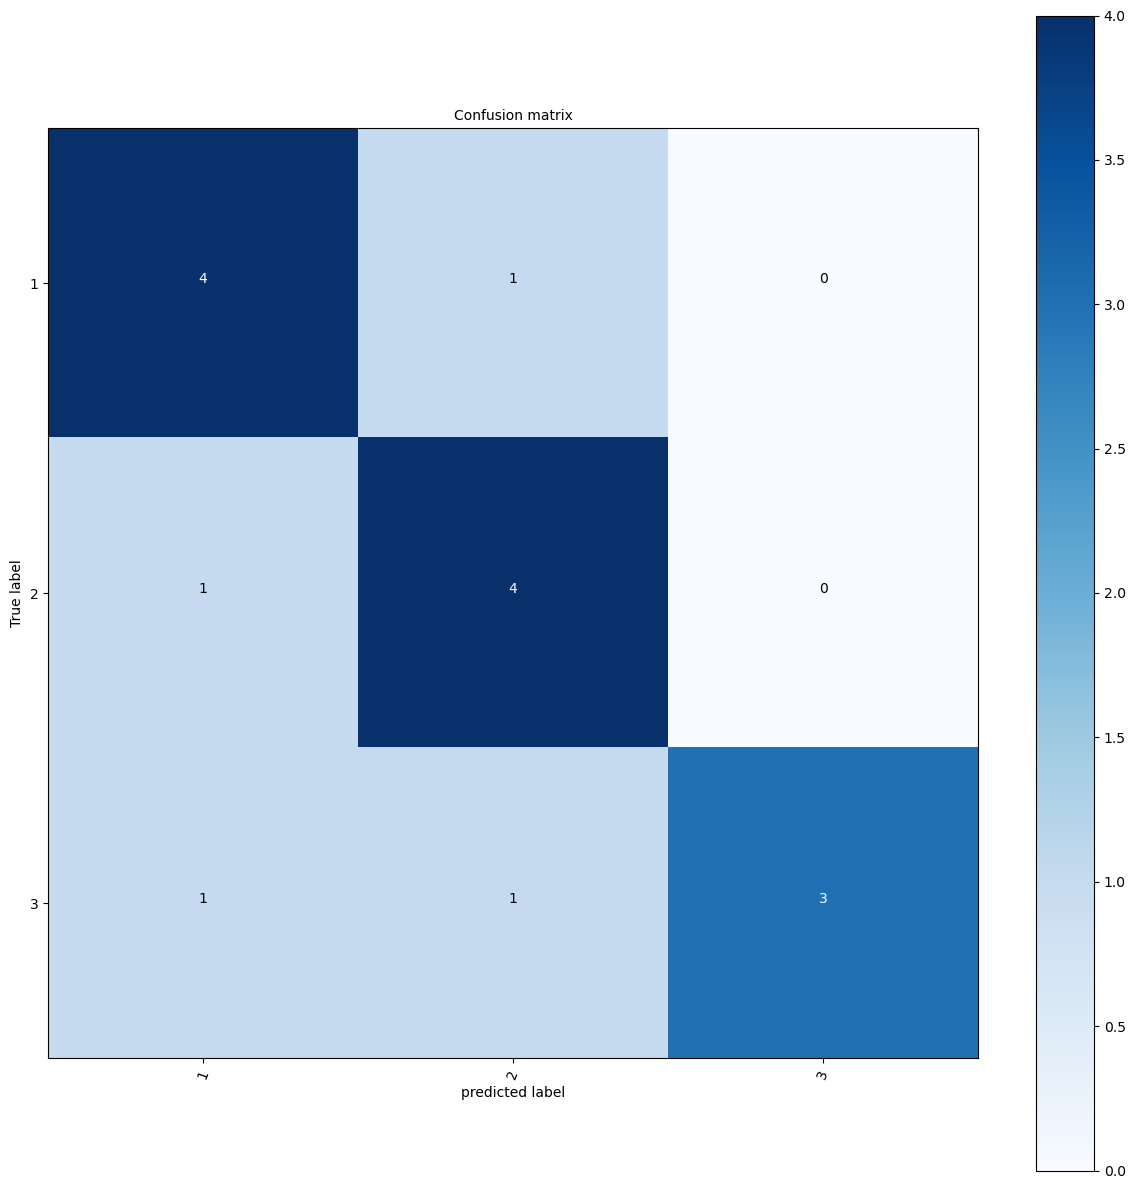

In [75]:
plot_confusion_matrix(y_true=y_true, y_pred=y_pred, class_names=[1, 2, 3])

In [51]:
cm = confusion_matrix(y_true, y_pred)

In [52]:
cm

array([[4, 1, 0],
       [1, 4, 0],
       [1, 1, 3]])

In [74]:
def plot_confusion_matrix(y_true, y_pred, class_names=None, figsize=(15, 15), text_size=10, norm=False, savefig=False):
    """
      Plots a confusion matrix of the given data.

      :param y_true: Array of truth labels (must be same shape as y_pred).
      :param y_pred: Array of predicted labels (must be same shape as y_true).
      :param class_names: Array of class labels (e.g. string form). If `None`, integer labels are used.
      :param figsize: Size of output figure (default=(15, 15)).
      :param text_size: Size of output figure text (default=10).
      :param norm: normalize values or not (default=False).
      :param savefig: save confusion matrix to file (default=False).

      Plots the decision boundary created by a model predicting on X.
      Inspired by the following two websites:
      https://cs231n.github.io/neural-networks-case-study
    """

    if isinstance(y_true, Dataset):
        raise TypeError('y_true is a dataset, please get the labels from the dataset using '
                        '\'y_labels = get_labels_from_dataset(dataset=dataset, index_only=True)\'')

    y_true, mlint.convert_to_sparse_or_binary(y=y_true)
    y_pred = mlint.convert_to_sparse_or_binary(y=y_pred)

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if class_names:
        labels = class_names
    else:
        labels = np.arange(cm.shape[0])

    # label the axes
    ax.set(title="Confusion matrix",
           xlabel="predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.title.set_size(text_size)

    plt.xticks(rotation=70, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set treshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)

    if savefig:
        fig.savefig("./confusion_matrix.png")

In [80]:
mld.download_images_google_search("'dog'")


Item no.: 1 --> Item name = 'dog'
Evaluating...
Starting Download...


Unfortunately all 10 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0

